# Ford GoBike Usage Pattern
> ***by Mohamed BOUSETTA MAHJOUB***

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to look at trip distribution and the most common user behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.

## Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consisted of ride duration and attributes of appoximately 180,000 individual rides. The attributes included information about ride time and stations, as well as additional information about users such as type, gender, birth year. Some data points were removed from the analysis due to inconsistencies or missing information. New features were added like start_day_week, start_hour, member_age, age_groups .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe    
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Cleaning Data

In [3]:
df_clean = df.copy()

# drop NAN Values
df_clean.dropna(inplace=True)

# convert member_birth_year type to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
# convert bike_id type to string
df_clean['bike_id'] = df_clean['bike_id'].astype(str)
# convert start_station_id type to string
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int).astype(str)
# convert end_station_id to string
df_clean['end_station_id'] = df_clean['end_station_id'].astype(int).astype(str)
# convert start_time type to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
# convert end_time type
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# extract start_year from start_time
df_clean['start_year'] = df_clean['start_time'].dt.year
# extract start_month from start_time
df_clean['start_month'] = df_clean['start_time'].dt.month
# extract start_day from start_time
df_clean['start_day'] = df_clean['start_time'].dt.day
# extract start_day_week from start_time
df_clean['start_day_week'] = df_clean['start_time'].dt.strftime("%A")
# extract start_hour from start_time
df_clean['start_hour'] = df_clean['start_time'].dt.hour

# calculate member_age
df_clean['member_age'] = df_clean['start_year'] - df_clean['member_birth_year']

# Bin edges that will be used to "cut" the data into age groups
bin_edges = [df_clean.member_age.min(), 24, 34, 64, df_clean.member_age.max() ]
# Labels for the four age groups
bin_names = ['Youth', 'Young Adults', 'Adults', 'Seniors'] 
# Creates age_groups column
df_clean['age_groups'] = pd.cut(df_clean['member_age'], bin_edges, labels=bin_names)

## Distribution of Rides by User Type & Gender

The Pie plots below show the usage of Ford GoBike system by User Type and Gender : 
- Subscribers contributed the majority of the bike usage, about 90%, while about 10% were consumed by cusomters (or casual users)
- Most riders were male. 

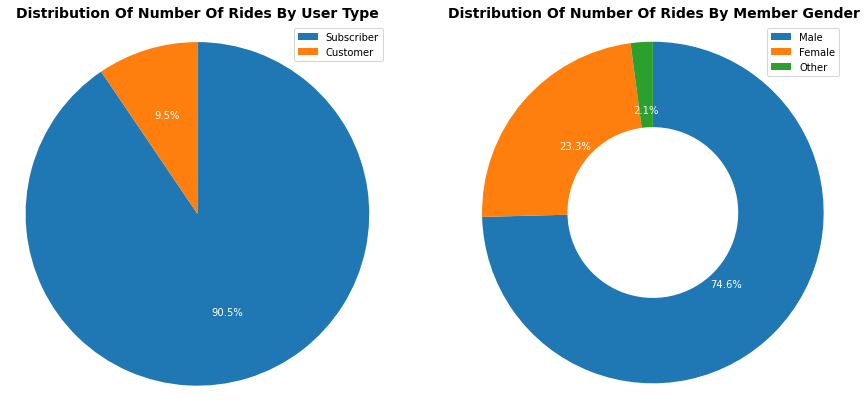

In [4]:
plt.figure(figsize = [15, 8])

# first plot : number of rides for each user_type
plt.subplot(1, 2, 1)
user_type = df_clean.user_type.value_counts()
plt.pie(user_type, labels = user_type.index, startangle = 90, autopct= '%1.1f%%',
        counterclock = False, textprops={'color':'white'});
plt.axis('square')
plt.title('Distribution of number of rides by user type'.title(), fontsize=14, weight='bold')
plt.legend()

# second plot : number of rides for each member_gender
plt.subplot(1, 2, 2)
sorted_counts = df_clean.member_gender.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct= '%1.1f%%',
        counterclock = False, textprops={'color':'white'}, wedgeprops = {'width' : 0.5});
plt.axis('square')
plt.title('Distribution of number of rides by member gender'.title(), fontsize=14, weight='bold')
plt.legend()

plt.show()

## Distribution of Rides by Age

The number of rides depends on user age. The bar plots below shows a huge usage of the bike share system by young adults (25-34 years old) espacially 31 years old riders.

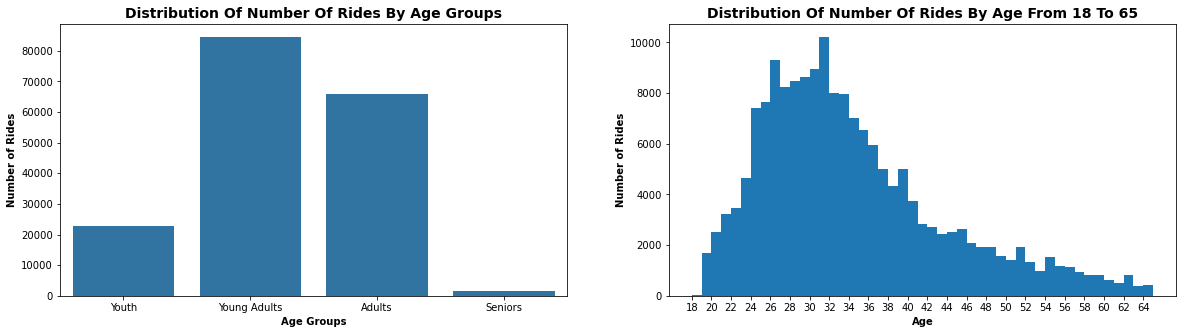

In [5]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
# first plot : number of rides for each age group
plt.subplot(1, 2, 1)
sb.countplot(data=df_clean, x='age_groups', color=base_color)
plt.xlabel('Age Groups', fontsize=10, weight='bold')
plt.ylabel('Number of Rides' , fontsize=10, weight='bold')
plt.title('Distribution of number of rides by Age Groups'.title(), fontsize=14, weight='bold')
# second plot : histogram of member age from 18 to 65
plt.subplot(1, 2, 2)
bins = np.arange(18, 66, 1)
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xticks(np.arange(18, 66, 2));
plt.xlabel('Age', fontsize=10, weight='bold')
plt.ylabel('Number of Rides' , fontsize=10, weight='bold')
plt.title('Distribution of number of rides by Age from 18 to 65'.title(), fontsize=14, weight='bold')

plt.show()

## Distribution of Rides by Time
Locking at the charts below, we find that the trip distribution over day hours peaks around two timeframes, 7am-10am and 16pm-19pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri).

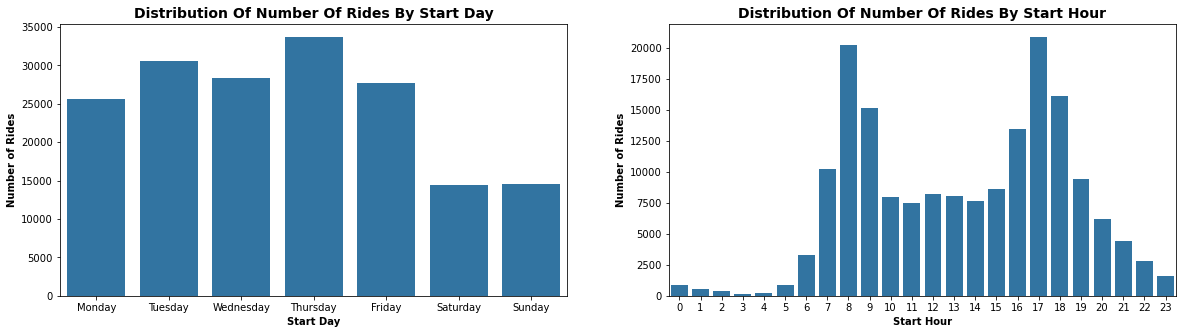

In [6]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
# first plot : number of rides on each satr day of the week
plt.subplot(1, 2, 1)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df_clean, x='start_day_week', color=base_color, order= order)
plt.xlabel('Start Day', fontsize=10, weight='bold')
plt.ylabel('Number of Rides' , fontsize=10, weight='bold')
plt.title('Distribution of number of rides by start day'.title(), fontsize=14, weight='bold')
# second plot : number of rides at each start hour of the day
plt.subplot(1, 2, 2)
sb.countplot(data=df_clean, x='start_hour', color=base_color)
plt.xlabel('Start Hour', fontsize=10, weight='bold')
plt.ylabel('Number of Rides' , fontsize=10, weight='bold')
plt.title('Distribution of number of rides by start hour'.title(), fontsize=14, weight='bold')

plt.show()

In [7]:
# calculate the IQR
Q1 = df_clean.duration_sec.quantile(0.25)
Q3 = df_clean.duration_sec.quantile(0.75)
IQR = Q3 - Q1
# calculate the duration limit for outliers
limit_ouliers = Q3 + IQR*1.5

# create log duration column
df_clean['duration_log'] = np.log10(df_clean.duration_sec)
# calculate the IQR for log duration
log_Q1 = df_clean.duration_log.quantile(0.25)
log_Q3 = df_clean.duration_log.quantile(0.75)
log_IQR = log_Q3 - log_Q1
# calculate the log duration limits for outliers
high_limit_ouliers = log_Q3 + log_IQR*1.5
low_limit_ouliers = log_Q1 - log_IQR*1.5

#numeric_vars = ['duration_sec', 'member_age', 'start_hour']
categoric_vars = ['user_type', 'member_gender', 'age_groups']

# cearte dataframe without oultiers
df1 = df_clean.query(f'duration_sec <= {limit_ouliers}')

## Distribution of Ride Durations
Duration has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high duration end. the proportion of outliers is 5.33%, that means 94.67% of rides were less than 1488s

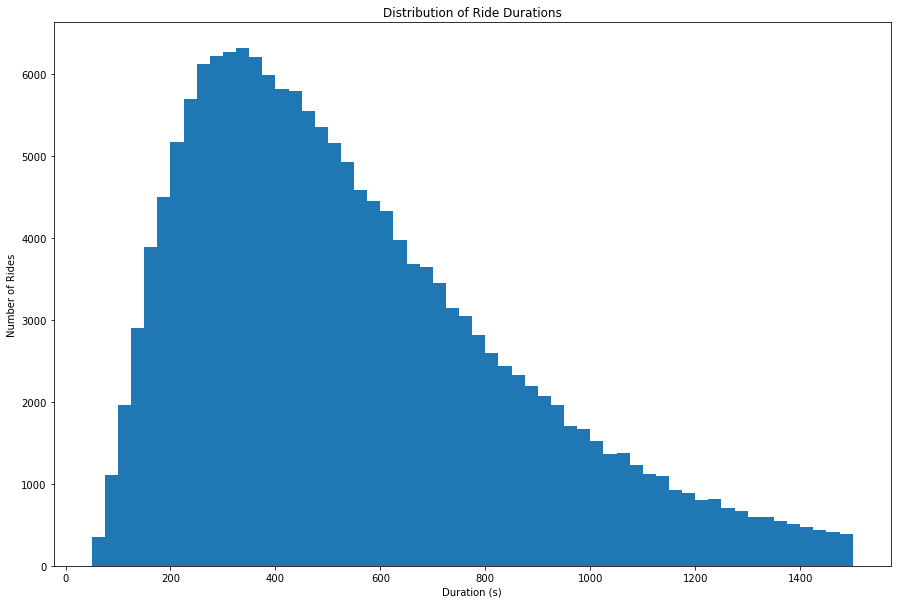

In [8]:
# plot duration hist without outliers
plt.figure(figsize=[15, 10])
binsize = 25
bins = np.arange(50, limit_ouliers+binsize, binsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Durations')
plt.show()

When plotted on a log-scale, the duration distribution looks like normal distribution, with one peak aroud 500s. we could reduce the proportion of outliers to 1.5%.

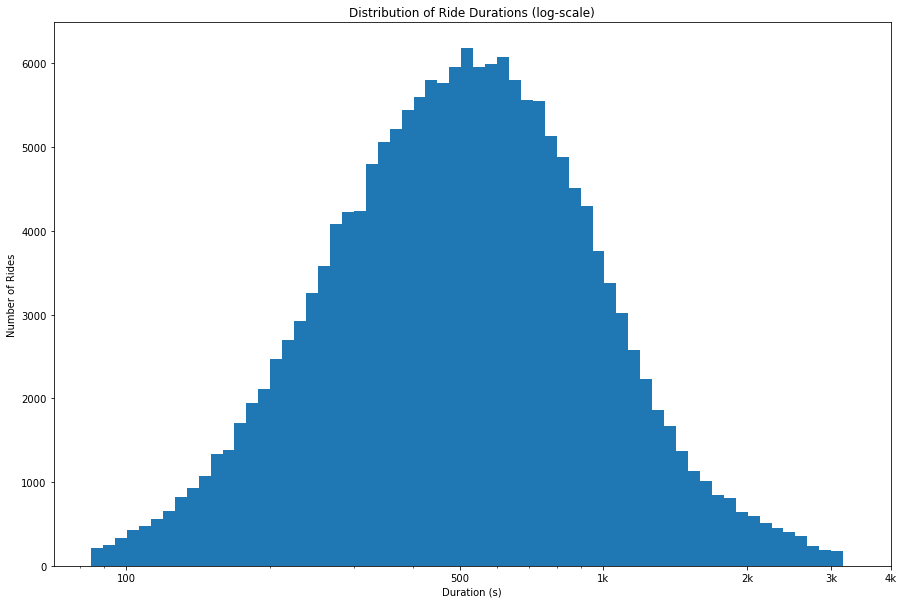

In [9]:
#plot histogram of log duration without outliers
log_binsize = 0.025
bins = 10 ** np.arange(low_limit_ouliers, high_limit_ouliers+log_binsize, log_binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 2e3, 3e3, 4e3], [100, 500, '1k', '2k','3k', '4k'])
plt.xlabel('Duration (s)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride Durations (log-scale)')
plt.show()

## Distribution of Ride Durations by User Type, Gender and Age Groups
The charts below show clearly the relationship between the main feature ride duration and the categoric features. we can see that subscriber ride duration is smaller than Customer and male riders tend to have shorter trips compared to female users. We find also that young male subcribers are the fastest riders and female senior customers are the slowest.

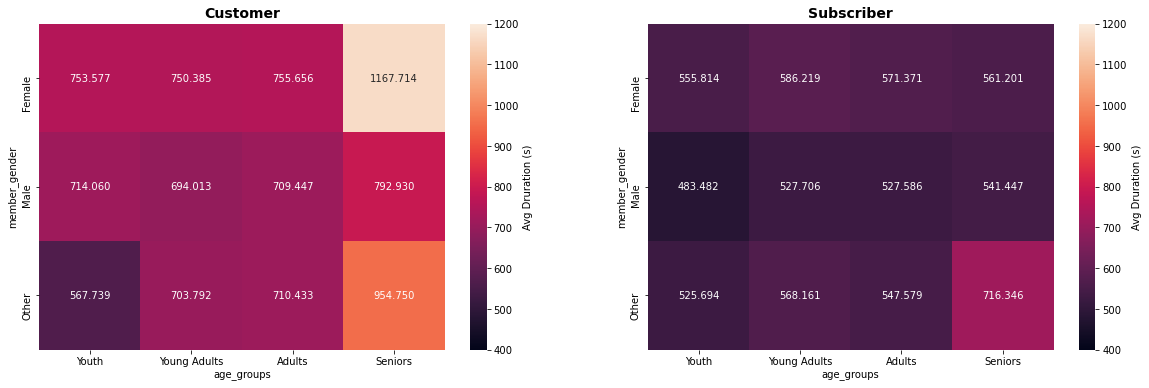

In [10]:
# create new table contains mean duration for each user type, age_groups and memeber_gende
cat_means = df1.groupby(['user_type','age_groups', 'member_gender'], as_index=False).mean()[['user_type','age_groups', 'member_gender','duration_sec']]
cat_means = cat_means.pivot(index = 'member_gender', columns = ['user_type','age_groups'],
                            values = 'duration_sec')

plt.figure(figsize = [20, 6])

# first plot : Customer mean duration by age_groups & member_gender
plt.subplot(1, 2, 1)
sb.heatmap(cat_means['Customer'], vmin=400, vmax=1200, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Avg Druration (s)'})
plt.title('Customer', fontsize=14, weight='bold')

# Second plot : Subscriber mean duration by age_groups & member_gender
plt.subplot(1, 2, 2)
sb.heatmap(cat_means['Subscriber'], vmin=400, vmax=1200, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Avg Druration (s)'})
plt.title('Subscriber', fontsize=14, weight='bold')

plt.show()

## Distribution of Ride Durations During Weekdays
We can see that when we remove the outliers, the ride duration average is the same all the week.
Taking in consideration the outliers, The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

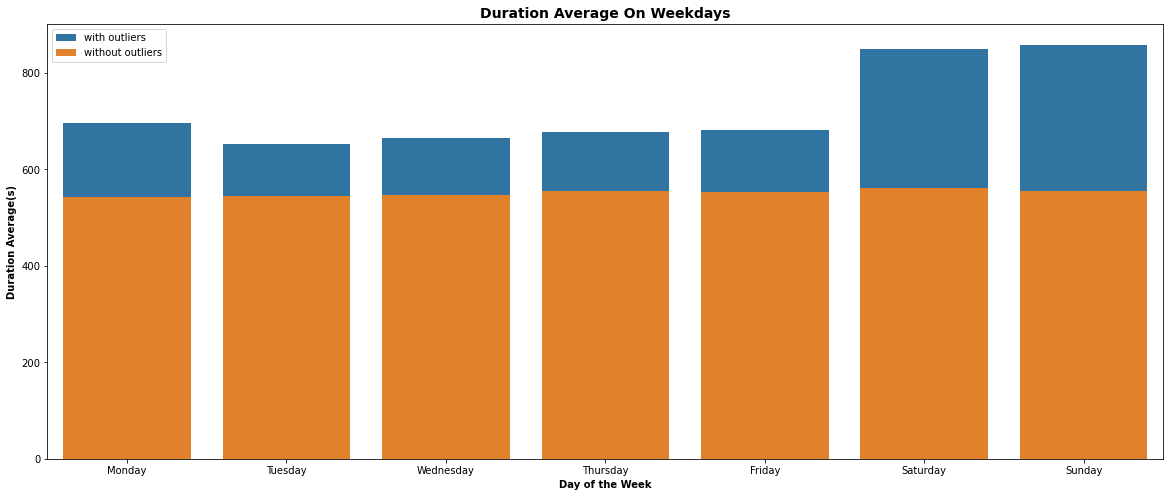

In [11]:
plt.figure(figsize = [20, 8])
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Average Trip Duration on Weekdays (with outliers)
# define x and y for barplot, use df_clean( with outliers)
x = df_clean.groupby('start_day_week').duration_sec.mean().index
y = df_clean.groupby('start_day_week').duration_sec.mean()
# plot x and y using seaborn.barplot
sb.barplot(x, y, color=base_color, order=order, label='with outliers')

# Average Trip Duration on Weekdays (without outliers)
# define x and y for barplot, use df1 (without outliers)
x = df1.groupby('start_day_week').duration_sec.mean().index
y = df1.groupby('start_day_week').duration_sec.mean()
# plot x and y using seaborn.barplot
sb.barplot(x, y, color=sb.color_palette()[1], order=order, label='without outliers')

# add x label and format it
plt.xlabel('Day of the Week', fontsize=10, weight='bold')
# add y label and format it
plt.ylabel('Duration Average(s)' , fontsize=10, weight='bold')
# add title and format it
plt.title('Duration Average on Weekdays'.title(), fontsize=14, weight='bold')
# add legend
plt.legend()
plt.show()

## Distribution of Ride Durations by Hours
the chart below shows that :
- Ride duration average is smaller and more stable duraing the rush hours
- The average usage time shown an increasing trend during normal hours 

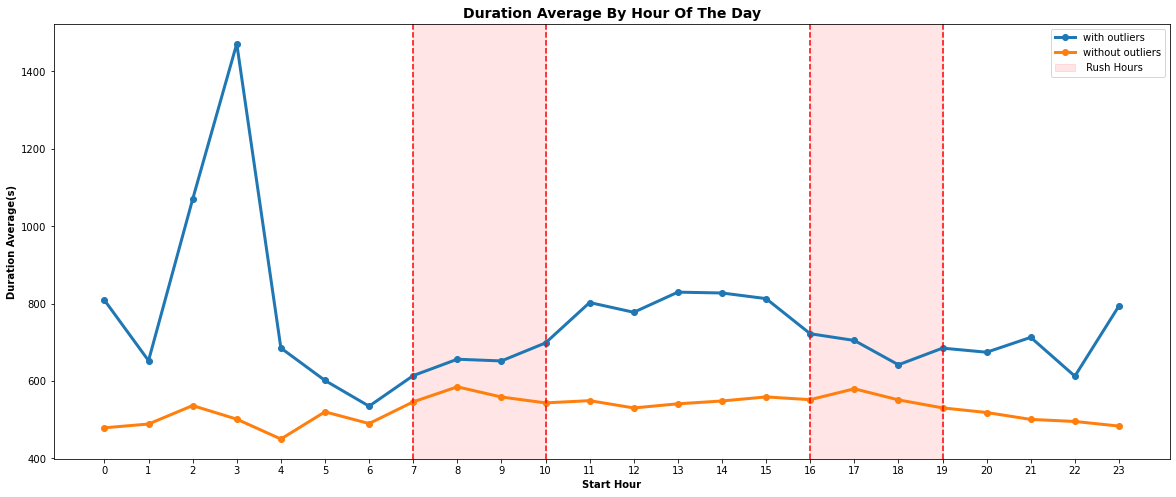

In [12]:
plt.figure(figsize = [20, 8])

# Average Trip Duration at Hour of the day (with outliers)
# define x and y for pointplot, use df_clean( with outliers)
x = df_clean.groupby('start_hour').duration_sec.mean().index
y = df_clean.groupby('start_hour').duration_sec.mean()
# plot x and y using seaborn.pointplot
plt.plot(x, y,'go-', color=base_color, linewidth=3, label='with outliers')

# Average Trip Duration at Hour of the day (without outliers)
# define x and y for barplot, use df1 (without outliers)
x = df1.groupby('start_hour').duration_sec.mean().index
y = df1.groupby('start_hour').duration_sec.mean()
# plot x and y using seaborn.pointplot
plt.plot(x, y, 'go-', color=sb.color_palette()[1], linewidth=3, label='without outliers')

# add rush hours using axvline & axvspan
plt.axvline(x=7, ls='--', color='r')
plt.axvline(x=10, ls='--',color='r')
plt.axvspan(7, 10, alpha=0.1, color='red', label=' Rush Hours')
plt.axvline(x=16, ls='--', color='r')
plt.axvline(x=19, ls='--', color='r')
plt.axvspan(16, 19, alpha=0.1, color='red')

# add x label and format it
plt.xlabel('Start Hour', fontsize=10, weight='bold')
# add y label and format it
plt.ylabel('Duration Average(s)' , fontsize=10, weight='bold')
# add title and format it
plt.title('Duration Average by Hour of the day'.title(), fontsize=14, weight='bold')
# add legend
plt.legend()
#show all xticks
plt.xticks(x)

plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!